(464, 803, 3)


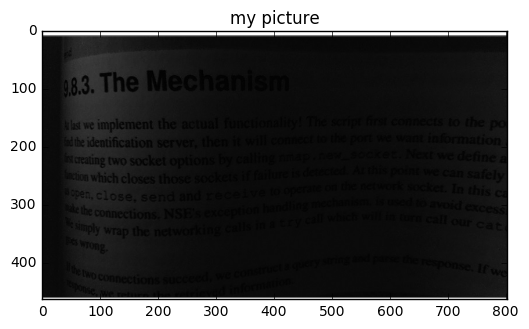

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [4]:
from matplotlib import pyplot as plt
import cv2
import matplotlib.cm as cm
import numpy as np
img = cv2.imread('./images/test.png')
print img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(thresh, im_bw) = cv2.threshold(gray, 12, 255, cv2.THRESH_BINARY)
plt.imshow(gray, cmap=cm.gray)
plt.title('my picture')
plt.show()
im_bw

In [5]:
im_bw_new=im_bw+100

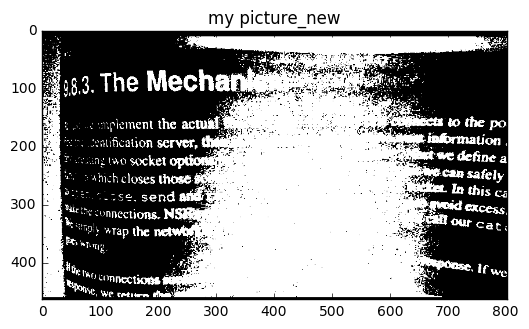

In [6]:
im_bw_new=im_bw-140
plt.imshow(im_bw_new, cmap=cm.gray)
plt.title('my picture_new')
plt.show()

In [7]:
img=np.zeros((200,200))
img

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [8]:

img[50:100,50:100]=255

In [9]:
img

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

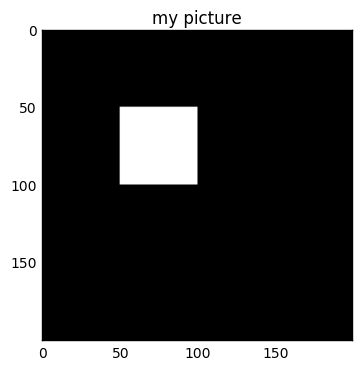

In [10]:
plt.imshow(img, cmap=cm.gray)
plt.title('my picture')
plt.show()

In [11]:
x = np.arange(200*200).reshape((200,200))
di=np.diag(np.diag(x))

In [12]:
di=di/200

In [13]:
img=img*di

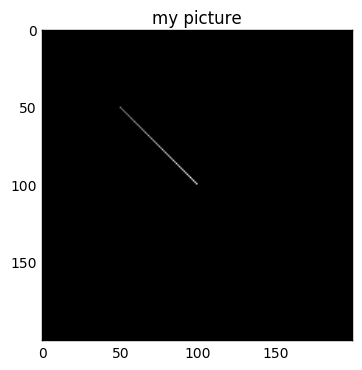

In [14]:
plt.imshow(img, cmap=cm.gray)
plt.title('my picture')
plt.show()

In [15]:
p=np.array([3,5])
R=np.array([[0.7,0.7],[-0.7,0.7]])
p_r=np.mat(R)*np.mat(p).transpose()

In [16]:
p_r

matrix([[ 5.6],
        [ 1.4]])

Inverse matrix

In [17]:
A=np.array([[2,2],[4,4]])

In [18]:
B=np.array([1,1])

In [19]:
B

array([1, 1])

In [20]:
A

array([[2, 2],
       [4, 4]])

In [21]:
from numpy.linalg import inv

In [22]:
convertable=True
A_inverse=None
try:
    A_inverse=inv(np.mat(A))
except Exception as ex:
    template = "An exception of type {0} occurred. Arguments:\n{1!r}"
    message = template.format(type(ex).__name__, ex.args)
    print type(ex).__name__


LinAlgError


In [23]:
#A_inverse

In [24]:
if A_inverse!=None:
    X=A_inverse*np.mat(B).transpose()
else:
    print "None"

None


In [25]:
convertable=True
A_inverse=None
try:
    A_inverse=inv(np.mat(A))
except np.linalg.LinAlgError as err:
    print "Matrix is not inversable"


Matrix is not inversable


In [26]:
A=np.arange(6)+1
A=A.reshape(2,3)

In [27]:
A.shape
A

array([[1, 2, 3],
       [4, 5, 6]])

In [28]:
U, s, V = np.linalg.svd(A)

In [29]:
U

array([[-0.3863177 , -0.92236578],
       [-0.92236578,  0.3863177 ]])

In [30]:
s

array([ 9.508032  ,  0.77286964])

In [31]:
V

array([[-0.42866713, -0.56630692, -0.7039467 ],
       [ 0.80596391,  0.11238241, -0.58119908],
       [ 0.40824829, -0.81649658,  0.40824829]])

In [47]:
from skimage.exposure import rescale_intensity
def convolve(image, kernel):
	# grab the spatial dimensions of the image, along with
	# the spatial dimensions of the kernel
	(iH, iW) = image.shape[:2]
	(kH, kW) = kernel.shape[:2]

	# allocate memory for the output image, taking care to
	# "pad" the borders of the input image so the spatial
	# size (i.e., width and height) are not reduced
	pad = (kW - 1) // 2
	image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
		cv2.BORDER_REPLICATE)
	output = np.zeros((iH, iW), dtype="float32")

	# loop over the input image, "sliding" the kernel across
	# each (x, y)-coordinate from left-to-right and top to
	# bottom
	for y in np.arange(pad, iH + pad):
		for x in np.arange(pad, iW + pad):
			# extract the ROI of the image by extracting the
			# *center* region of the current (x, y)-coordinates
			# dimensions
			roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

			# perform the actual convolution by taking the
			# element-wise multiplicate between the ROI and
			# the kernel, then summing the matrix
			k = (roi * kernel).sum()

			# store the convolved value in the output (x,y)-
			# coordinate of the output image
			output[y - pad, x - pad] = k

	# rescale the output image to be in the range [0, 255]
	#output = rescale_intensity(output, in_range=(0, 255))
	#output = (output * 255).astype("uint8")

	# return the output image
	return output

In [48]:
img = cv2.imread('./images/Lena.png')
print img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kenelA=np.ones((3,3))

(220, 220, 3)


In [49]:
kenelB=np.zeros((3,3))

In [50]:
kenelB[1,1]=2

In [51]:
kenelB

array([[ 0.,  0.,  0.],
       [ 0.,  2.,  0.],
       [ 0.,  0.,  0.]])

In [60]:
img1=convolve(gray,kenelA)
img2=convolve(gray,kenelB)

In [61]:
img1=img1/9
img2=img2/2


In [39]:
def show_img(img,plt,titre):
    plt.imshow(img, cmap=cm.gray)
    plt.title(titre)
    plt.show()


In [57]:
from matplotlib import pyplot as plt
import cv2
import matplotlib.cm as cm

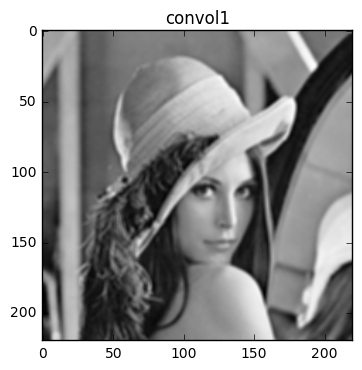

In [58]:
show_img(img1,plt,"convol1")

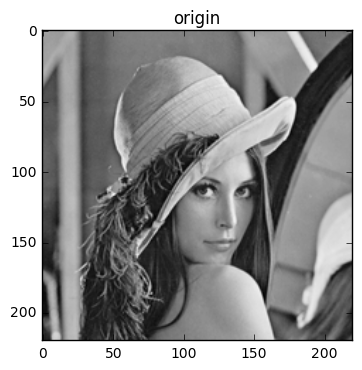

In [42]:
show_img(gray,plt,"origin")

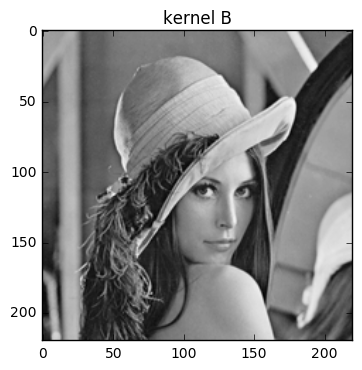

In [62]:
show_img(img2,plt,"kernel B")

In [63]:
img_detail=img2-img1

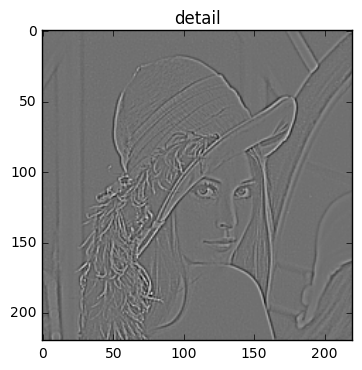

In [64]:
show_img(img_detail,plt,"detail")

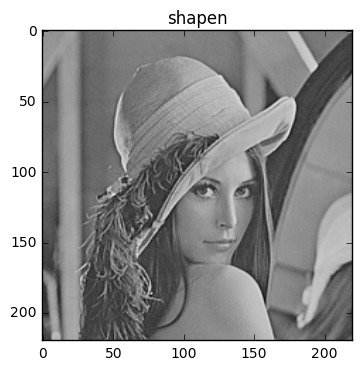

In [66]:
shapen_img=gray+img_detail
show_img(shapen_img,plt,"shapen")

In [68]:
img_vstack=np.hstack((shapen_img,gray))

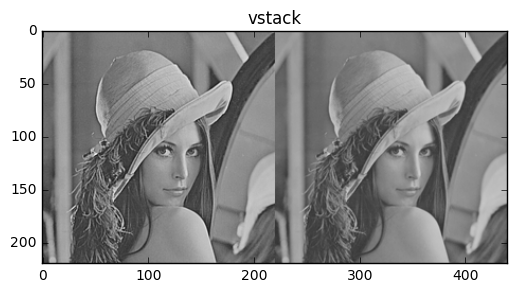

In [69]:
show_img(img_vstack,plt,"vstack")